✅ Model Trained Successfully!
📊 R2 Score: -0.15567497249713225
📉 MAE: 10296.339508468449

📅 Predicted Monthly Sales for Year 2024
    Year  Month  Predicted_Sales
0   2024      1     33605.033084
1   2024      2     34541.876511
2   2024      3     34808.765428
3   2024      4     34621.223778
4   2024      5     39964.164176
5   2024      6     39949.455624
6   2024      7     38654.225337
7   2024      8     37335.934879
8   2024      9     36291.252689
9   2024     10     36026.832330
10  2024     11     36456.352346
11  2024     12     36734.635046


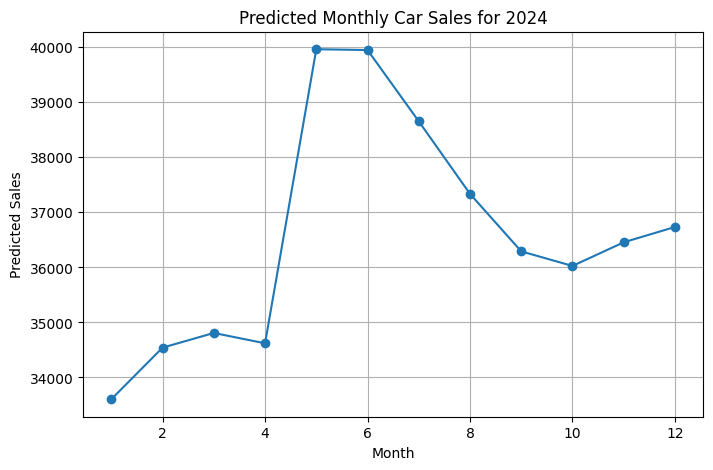

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import joblib
from datetime import datetime, timedelta


np.random.seed(42)
start_date = datetime(2020, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(500)]

df = pd.DataFrame({
    'Order Date': dates,
    'Quantity': np.random.randint(1, 10, 500),
    'Discount': np.random.uniform(0, 0.3, 500),
    'Sales': np.random.uniform(10000, 50000, 500)
})
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day




features = ['Year', 'Month', 'Day', 'Quantity', 'Discount']
X = df[features]
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("✅ Model Trained Successfully!")
print("📊 R2 Score:", r2_score(y_test, y_pred))
print("📉 MAE:", mean_absolute_error(y_test, y_pred))

# Save model
joblib.dump(model, "car_sales_forecast_model.pkl")

# ===============================
# 📈 Predict Future Sales (User Input)
# ===============================
# Example: Enter any year (like 2026)
future_year = int(input("Enter a year to forecast sales (e.g. 2026): "))

# Create a dummy dataset for all months in that year
future_data = pd.DataFrame({
    'Year': [future_year]*12,
    'Month': list(range(1,13)),
    'Day': [15]*12,           # middle of each month
    'Quantity': [5]*12,       # assumed average
    'Discount': [0.1]*12      # assumed average discount
})

# Predict sales
future_predictions = model.predict(future_data)
future_data['Predicted_Sales'] = future_predictions

# ===============================
# 📊 Display Forecast Results
# ===============================
print("\n📅 Predicted Monthly Sales for Year", future_year)
print(future_data[['Year','Month','Predicted_Sales']])

# Plot forecast
plt.figure(figsize=(8,5))
plt.plot(future_data['Month'], future_data['Predicted_Sales'], marker='o')
plt.title(f"Predicted Monthly Car Sales for {future_year}")
plt.xlabel("Month")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()